# 1.0 Cria máscaras das imagens anotadas com o LabelMe

Esse algoritmo cria as máscaras das imagens positivas de Leishmaniose anotadas pela Nathália.

Outubro de 2021

In [1]:
from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET
from glob import glob
from os.path import join, exists
from os import makedirs

In [2]:
# Variáveis
base  = '../dataset/labelMe/collection/'
files = glob(base + 'Annotations/users/romuere/leishmanione/positivo/*.xml')
tipo_mascara = 'geral' # [geral, individual]
extensao = 'png' # [png, jpg]
savedir = base + 'masks-' + tipo_mascara

poligonos = []
filename = ''
imageWidth = 0
imageHeight = 0

black = (0, 0, 0)
white = (255, 255, 255)
bgcolor = black
fgcolor = white

In [3]:
# Caso o diretório não tenha sido criado
if not exists(savedir):
    makedirs(savedir)

In [4]:
# Redefinir variáveis para os valores padrão
# Usado ao carregar um novo arquivo
def clearVars():
    global poligonos, filename, imageWidth, imageHeight
    poligonos = []
    filename = ''
    imageWidth = 0
    imageHeight = 0

In [5]:
# Analisa o arquivo XML e preenche a lista de polígonos
def parseXML(file):
    clearVars() # Redefine variáveis
    print('Passando arquivo ' + file)
    
    global poligonos, filename, imageWidth, imageHeight
    tree = ET.parse(file)
    root = tree.getroot()
    
    for child in root: # Todas as tags do arquivo
        if child.tag == 'object': # Pega os objetos
            
            obj_deleted = child[1].text # Verifica se o objeto foi deletado
            if (obj_deleted == str(0)): # Pega os objetos que não tenham sido deletados
            
                for item in child: # Propriedades de cada objeto
                    if item.tag == 'polygon': # Pega as marcações de cada objeto
                        points = []
                        for item_under_polygon in item: # Todos os itens do poligno
                            if item_under_polygon.tag == 'pt': # Pega os pontos do poligno
                                x = item_under_polygon[0].text
                                y = item_under_polygon[1].text
                                points.append((float(x), float(y)))
                        poligonos.append(points)

        elif child.tag == 'filename':
            filename = child.text[0:-4]
            
        elif child.tag == 'imagesize':
            imageHeight = int(child[0].text)
            imageWidth = int(child[1].text)

In [6]:
def generateImageGeral(filename):
    img = Image.new('RGB', (imageWidth, imageHeight), bgcolor)
    pixels = img.load()
    draw = ImageDraw.Draw(img)
    
    for polygon in poligonos: # desenha os polígonos
        draw.polygon(polygon, fill=fgcolor)    
        
    img.save(str(join(savedir, filename)))

In [7]:
def generateImageIndividual(filename):
    cont = 1
    
    for polygon in poligonos: # desenha os polígonos
        
        # Desenha cada amastigota individualmente
        img = Image.new('RGB', (imageWidth, imageHeight), bgcolor)
        pixels = img.load()
        draw = ImageDraw.Draw(img)
        draw.polygon(polygon, fill=fgcolor)
        
        arquivo = filename + '-mask' + str(cont).zfill(3) + '.' + extensao
        img.save(str(join(savedir, arquivo)))
        
        cont+=1

In [8]:
# Tipo de imagem gerada
if (tipo_mascara == 'individual'):
    
    # Lista de arquivos para converter
    for f in files:
        parseXML(f)

        print('Gerando imagem binária')
        print('Salvando imagem ' + filename)

        generateImageIndividual(filename)
else:
    
    # Lista de arquivos para converter
    for f in files:
        parseXML(f)

        print('Gerando imagem binária')
        print('Salvando imagem ' + filename)

        filename = filename + '-mask.' + extensao
        generateImageGeral(filename)

Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/imagem32.xml
Gerando imagem binária
Salvando imagem imagem32
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/imagem35.xml
Gerando imagem binária
Salvando imagem imagem35
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/img_20200221_091847.xml
Gerando imagem binária
Salvando imagem img_20200221_091847
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/imagem33.xml
Gerando imagem binária
Salvando imagem imagem33
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/img_20200803_112907.xml
Gerando imagem binária
Salvando imagem img_20200803_112907
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/imagem15.xml
Gerando imagem binária
Salvando imagem imagem15
Passando arquivo ../

Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200819-105726037.xml
Gerando imagem binária
Salvando imagem cm200819-105726037
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200819-104305005.xml
Gerando imagem binária
Salvando imagem cm200819-104305005
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200819-104821002.xml
Gerando imagem binária
Salvando imagem cm200819-104821002
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/imagem28.xml
Gerando imagem binária
Salvando imagem imagem28
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200826-123157035.xml
Gerando imagem binária
Salvando imagem cm200826-123157035
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200826-100448018.xml
Gerando imagem binária

Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200819-110800036.xml
Gerando imagem binária
Salvando imagem cm200819-110800036
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200826-100229006.xml
Gerando imagem binária
Salvando imagem cm200826-100229006
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200819-105922049.xml
Gerando imagem binária
Salvando imagem cm200819-105922049
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/imagem19.xml
Gerando imagem binária
Salvando imagem imagem19
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/cm200826-154114007.xml
Gerando imagem binária
Salvando imagem cm200826-154114007
Passando arquivo ../dataset/labelMe/collection/Annotations/users/romuere/leishmanione/positivo/imagem39.xml
Gerando imagem binária
Salvando 

# 2.0 Padroniza as máscaras geradas

In [9]:
# Imports
from skimage.io import imread_collection, imsave, imread
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Ler todas as máscaras
masks = glob(savedir + '/*.' + extensao)

# Faz o ordenamento
masks = sorted(masks)

# Ler as máscaras
mascaras = imread_collection(masks)

(949, 768, 3)


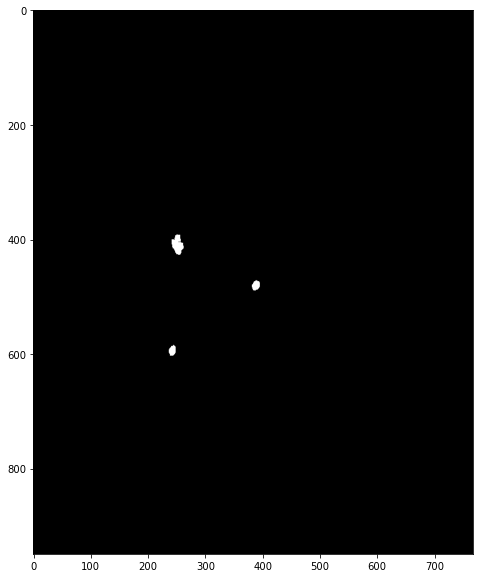

In [11]:
# Verifica a imagem para confirmar que apenas um canal de cor já traz a informação da máscara
print(mascaras[0].shape)
plt.figure(figsize=(15, 10))
plt.imshow(mascaras[0][:,:,0],cmap='gray')

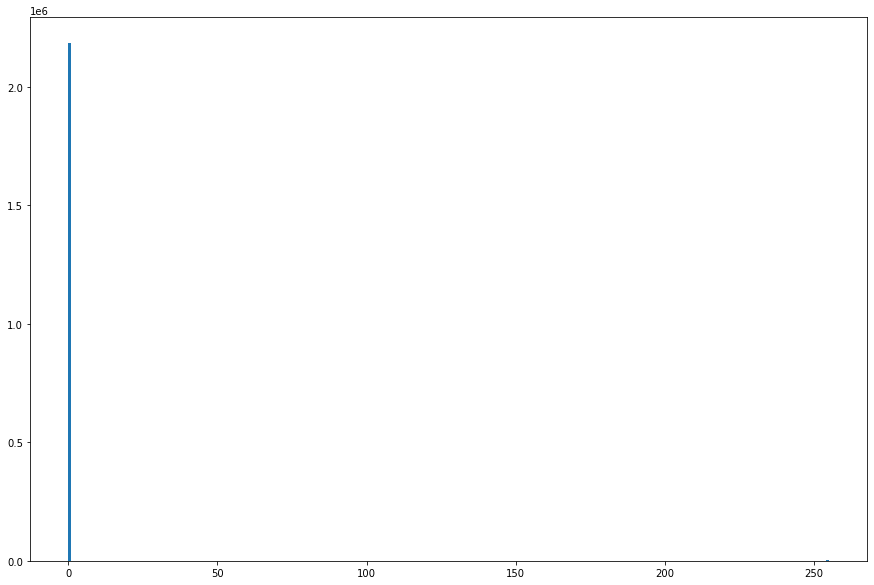

In [12]:
# Verifica o histograma para limiarização
plt.figure(figsize=(15, 10))
plt.hist(mascaras[0].ravel(),range(256))
plt.show()

In [13]:
# Tratando as máscaras
# Pega só um canal de cor 0 e transforma em imagem binária (m[:,:,0] > 10)
mascara_binaria = [m[:,:,0] > 10 for m in mascaras]

# 3.0 Verifica todas as máscaras gerais manualmente

Objetivo: Verificar se todas as **máscaras gerais** foram geradas corretamente

In [14]:
# Indice da imagem.
indice = 0

# Problemas: 41, 44, etc.

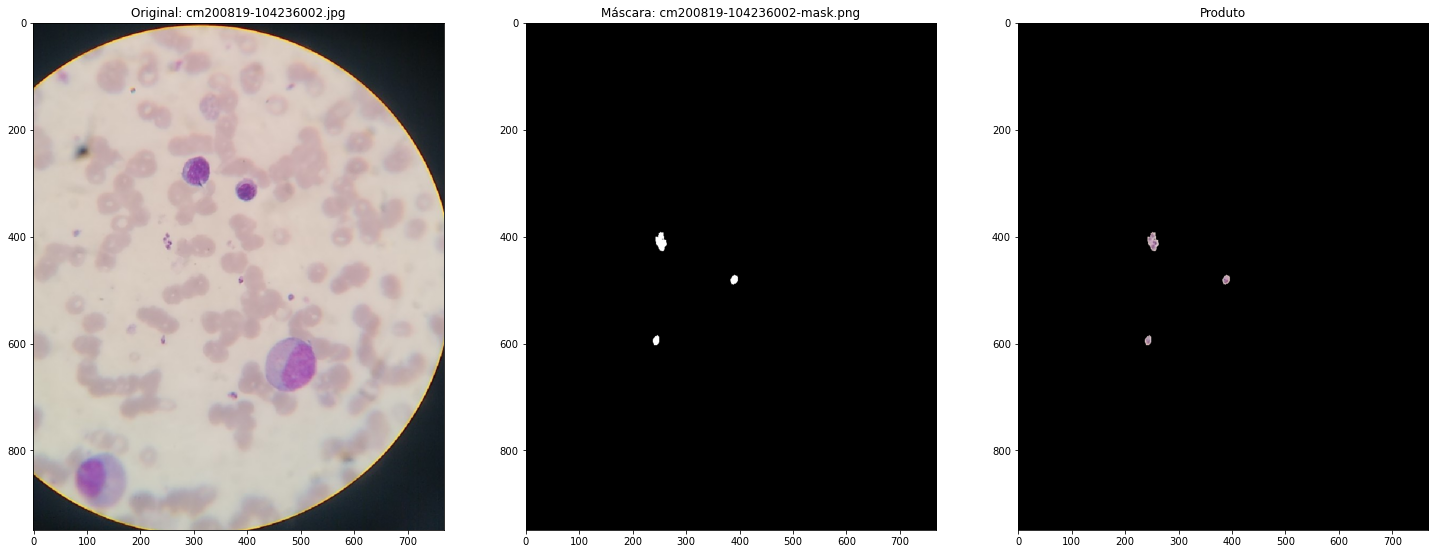

In [15]:
import copy 

if (tipo_mascara == 'geral'):
    
    # Faz a leitura de todas as imagens
    images = glob(base + 'Images/users/romuere/leishmanione/positivo/*.jpg')
    images = sorted(images)
    imagens = imread_collection(images)
    
    # Multiplicação da imagem pela máscara
    produto_tres_dimensoes = copy.copy(imagens[indice][:,:,0:3])

    produto_tres_dimensoes[:,:,0] = imagens[indice][:,:,0]*mascara_binaria[indice]
    produto_tres_dimensoes[:,:,1] = imagens[indice][:,:,1]*mascara_binaria[indice]
    produto_tres_dimensoes[:,:,2] = imagens[indice][:,:,2]*mascara_binaria[indice]

    def exibe_imagens(imgs):
        fig, ax = plt.subplots(1, 3, figsize=(25, 15))
        ax = ax.ravel()

        ax[0].imshow(imgs[0], cmap="gray")
        ax[0].set_title("Original: " + images[indice].split('/')[-1])

        ax[1].imshow(imgs[1], cmap="gray")
        ax[1].set_title("Máscara: " + masks[indice].split('/')[-1])

        ax[2].imshow(imgs[2], cmap="gray")
        ax[2].set_title("Produto")

    imgs = imagens[indice], mascaras[indice], produto_tres_dimensoes
    exibe_imagens(imgs)

# 4.0 Salvando as máscaras binárias de apenas um canal 

In [16]:
# Definindo o diretório
diretorio = base + 'masks-' + tipo_mascara + '-binary/'

# Cria o diretório, caso não exista
if not exists(diretorio):
    makedirs(diretorio)

In [17]:
# Salvando as máscaras de acordo com o tipo: [geral, individual]
if (tipo_mascara == 'individual'):
    for i in range(0, len(masks)):   
        
        # Pegando o nome e número da máscara
        mask_name = masks[i].split('/')[-1]
        mask_number = mask_name[-7:-4]

        filename = diretorio + mask_name[0:-11] + 'binary-mask' + mask_number + '.' + extensao
        imsave(filename, img_as_ubyte(mascara_binaria[i]))
else:
    for i in range(0, len(masks)):
        filename = diretorio + masks[i].split('/')[-1][:-8] + 'binary-mask.' + extensao
        imsave(filename, img_as_ubyte(mascara_binaria[i]))

(2703, 2963) 255


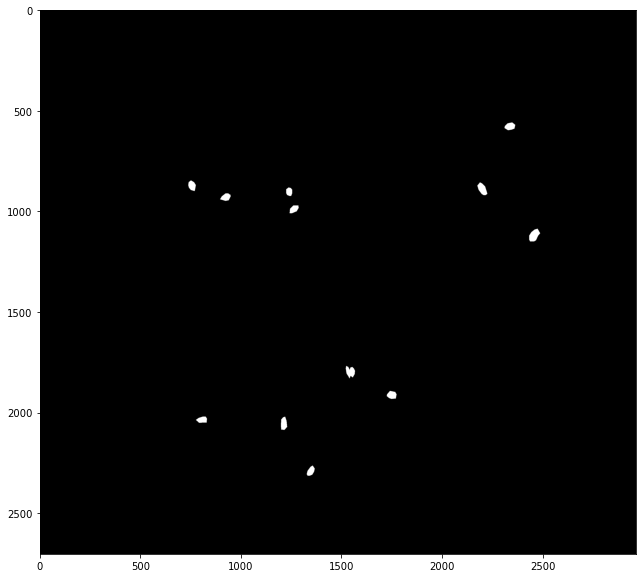

In [18]:
# Verificando se salvou certo
test = imread(filename) # último arquivo salvo
print(test.shape, test.max())
plt.figure(figsize=(15, 10))
plt.imshow(test,cmap='gray')